<a href="https://colab.research.google.com/github/armandovl/funciones_descriptiva/blob/main/Clase_Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.- Importar los datos

In [2]:
#importamos librerías de cajon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importamos el data frame
url="https://raw.githubusercontent.com/armandovl/datasets_uno/main/atitanic.csv"
datos= pd.read_csv(url) #leer la url y ponerlo en un dataframe
datos.head() #ver el encabezado

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere


## 1.-Manejo del Data Frame

In [4]:
datos.head(8) #primeras 8 filas

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
5,885,"Sutehall, Mr. Henry Jr",25.0,3,male,0,S,muere
6,884,"Banfield, Mr. Frederick James",28.0,2,male,0,S,muere
7,883,"Dahlberg, Miss. Gerda Ulrika",22.0,3,female,0,S,muere


In [5]:
datos.tail(5) #últimas 8 filas

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive
713,1,"Braund, Mr. Owen Harris",22.0,3,male,1,S,muere


In [6]:
datos.shape #imprime las filas y las columnas

(714, 8)

In [7]:
datos.columns #nombre de las columnas

Index(['PassengerId', 'Name', 'Age', 'Pclass', 'Sex', 'Family', 'Embarked',
       'Survived'],
      dtype='object')

In [8]:
datos.dtypes #tipos de variables

PassengerId      int64
Name            object
Age            float64
Pclass           int64
Sex             object
Family           int64
Embarked        object
Survived        object
dtype: object

In [9]:
datos.info() # nombre columna conteo nulos tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Name         714 non-null    object 
 2   Age          714 non-null    float64
 3   Pclass       714 non-null    int64  
 4   Sex          714 non-null    object 
 5   Family       714 non-null    int64  
 6   Embarked     714 non-null    object 
 7   Survived     714 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 44.8+ KB


In [ ]:
#ver localización iloc
#iloc [columnas:filas]
datos.iloc[0:]

In [10]:
#cambiar nombre de ciertas columnas
datos=datos.rename(columns={'PassengerId':'Identificador',
                      'Name':'El nombre',
                      'Age':'la edad'}
             )
datos

,Identificador,El nombre,la edad,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...,...
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [11]:
#cambiar nombre de todas columnas
datos.columns = ['Id', 'Nombre', 'Edad', 'Clase', 'Sexo', 'Familia','Embarcacion','Sobrevivientes']
datos

,Id,Nombre,Edad,Clase,Sexo,Familia,Embarcacion,Sobrevivientes
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...,...
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [12]:
#eliminar columna
datos=datos.drop(['Id'],axis=1)
datos

,Nombre,Edad,Clase,Sexo,Familia,Embarcacion,Sobrevivientes
0,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...
709,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [13]:
#eliminar varias columnas
datos=datos.drop(['Nombre',"Familia",'Embarcacion'],axis=1)
datos

,Edad,Clase,Sexo,Sobrevivientes
0,32.0,3,male,muere
1,26.0,1,male,vive
2,19.0,1,female,vive
3,27.0,2,male,muere
4,39.0,3,female,muere
...,...,...,...,...
709,35.0,3,male,muere
710,35.0,1,female,vive
711,26.0,3,female,vive
712,38.0,1,female,vive


In [14]:
datos.describe() #descriptivos

,Edad,Clase
count,714.000000,714.000000
mean,29.699118,2.236695
std,14.526497,0.838250
min,0.420000,1.000000
25%,20.125000,1.000000
50%,28.000000,2.000000
75%,38.000000,3.000000
max,80.000000,3.000000


In [15]:
datos.describe().round(1) #descriptivos un decimal

,Edad,Clase
count,714.0,714.0
mean,29.7,2.2
std,14.5,0.8
min,0.4,1.0
25%,20.1,1.0
50%,28.0,2.0
75%,38.0,3.0
max,80.0,3.0


In [16]:
datos.describe().round(1).transpose() #descriptivos un decimal y transpuesto

,count,mean,std,min,25%,50%,75%,max
Edad,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0
Clase,714.0,2.2,0.8,1.0,1.0,2.0,3.0,3.0


In [17]:
datos.Clase=pd.Categorical(datos["Clase"]) #Transformamos en cateorica

In [18]:
datos.info() #vemos que la variable ya es categorica 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Edad            714 non-null    float64 
 1   Clase           714 non-null    category
 2   Sexo            714 non-null    object  
 3   Sobrevivientes  714 non-null    object  
dtypes: category(1), float64(1), object(2)
memory usage: 17.7+ KB


In [19]:
datos.describe().round(1).transpose() #como Clase ya es categórica ya no aparecen sus descriptivos

,count,mean,std,min,25%,50%,75%,max
Edad,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0


## 2.-Estadísticos descriptivos de una variable

In [ ]:
#bibliografía https://www.odiolaestadistica.com/estadistica-python/asimetria/
#bibliografía https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

# Medidas de tendencia central
total=len(datos["Edad"]) #largo de la variable
media = datos["Edad"].mean() #media
mediana = datos["Edad"].median() #mediana
moda = datos["Edad"].mode()[0] #moda no se olvide poner el [0]
#Medidas de dispersión
varianza= datos["Edad"].var(ddof=1) #varianza ddof=0 poblacional ddof=1 muestral
desv_st=datos["Edad"].std(ddof=1) #desviación estandar ddof=0 poblacional ddof=1 muestral
coef_var=(datos["Edad"].std(ddof=1)/ datos["Edad"].mean())*100 #agregar el *100

#creamos un Data Frame llamado descriptivos_a
descriptivos_a=pd.DataFrame()
descriptivos_a["medida"]=["total_datos","media","mediana","moda","varianza","desviacion_estandar","coficiente_variación"]
descriptivos_a["valores"]=[total,media,mediana,moda,varianza,desv_st,coef_var]

descriptivos_a.round(1)

,medida,valores
0,total_datos,714.0
1,media,29.7
2,mediana,28.0
3,moda,24.0
4,varianza,211.0
5,desviacion_estandar,14.5
6,coficiente_variación,48.9


In [ ]:
#medidas de posición
p90 = datos["Edad"].quantile(0.9) #percentil 90
rango_inter_cuartil=datos["Edad"].quantile(0.75)-datos["Edad"].quantile(0.25)

print("percentil x =",p90)
print("Rango intercuartil=",rango_inter_cuartil)


percentil x = 50.0
Rango intercuartil= 17.875


In [ ]:
#otras medidas estadísticas
import scipy.stats as st

In [ ]:
st.sem(datos["Edad"], ddof = 1) #error estandar de la media

0.5436404994496713

In [ ]:
#intervalo de confianza
st.t.interval(alpha=0.90,
              df=len(datos["Edad"])-1,
              loc=np.mean(datos["Edad"]), 
              scale=st.sem(datos["Edad"]))

(28.803745252609882, 30.594490041507772)

In [ ]:
#sacar la asimetría y la curtosis
print('Kursotis:', st.kurtosis(datos["Edad"])) 
print('Skewness:', st.skew(datos["Edad"]))

Kursotis: 0.16863657224286044
Skewness: 0.38828985146986567


In [ ]:
#probar si hay distribución normal para +50 registros
#biblio https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html

# Shapiro-Wilk test
# ==============================================================================

estadistico, p_value = st.shapiro(datos["Edad"])
print(f"Estadístico = {estadistico}, p-value = {p_value}")

# ====si p valor menor a 0.05 entonces la dstribución es no normal=============

Estadístico = 0.9814548492431641, p-value = 7.322165629375377e-08


In [ ]:
# D'Agostino's K-squared test para +50 registros nunca utilizar en -20
# ==============================================================================
k2, p_value = st.normaltest(datos["Edad"])
print(f"Estadístico = {k2}, p-value = {p_value}")

# ====si p valor menor a 0.05 entonces la dstribución es no normal=============

Estadístico = 18.10503295208975, p-value = 0.00011709599657350791


In [ ]:
#Kolmogorov – Smirnoff para muestras pequeñas

# ==============================================================================
st.kstest(datos["Edad"], 'norm')
# ====si p valor menor a 0.05 entonces la dstribución es no normal=============

KstestResult(statistic=0.9650366565902186, pvalue=0.0)

## 3.- Métodos gráficos de exploración de una variable cuantitativa

### 3.1 Histogramas

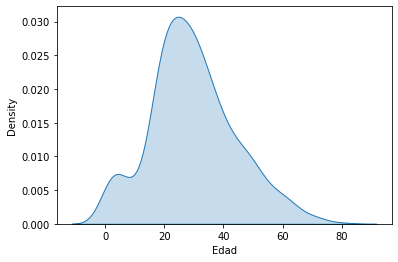

In [ ]:
#mirar la distribución mediante kdeplot
sns.kdeplot(data=datos["Edad"], shade=True)
plt.show()

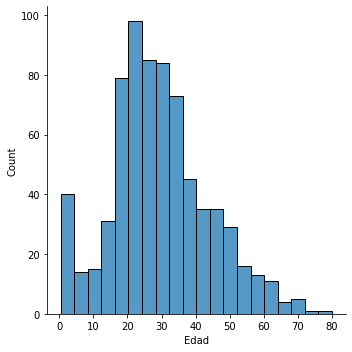

In [ ]:
#mirar la distribución mediante displot
sns.displot(datos["Edad"])
plt.show()

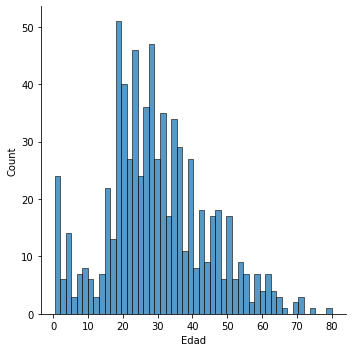

In [ ]:
sns.displot(datos["Edad"],bins=50) #aumentar el numero de columnas 
plt.show()

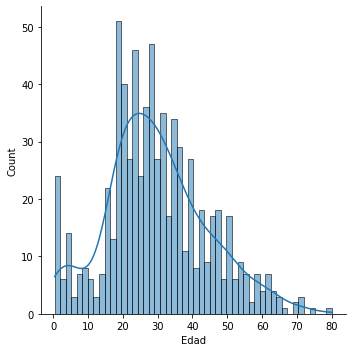

In [ ]:
sns.displot(datos["Edad"],bins=50, kde=True) #agregar linea de tendencia
plt.show()

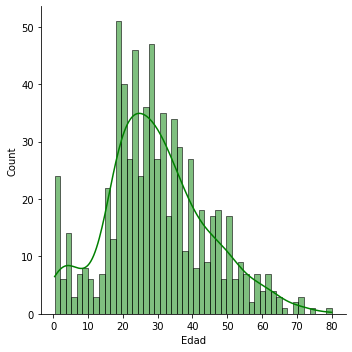

In [ ]:
sns.displot(datos["Edad"],bins=50, kde=True, color="green") #cambiar color
plt.show()

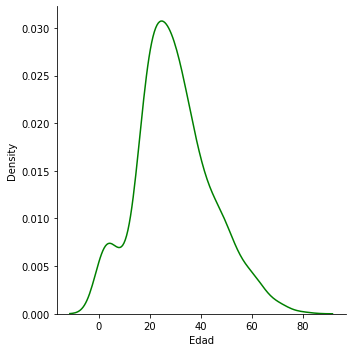

In [ ]:
sns.displot(datos["Edad"], color="green",kind="kde") #dejar simplemente  la linea 
plt.show()

### 3.2 Gráfico de Cajas y bigotes

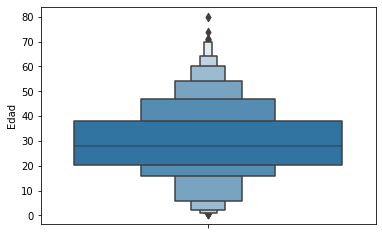

In [ ]:
#hacer un boxplot vertical
sns.boxenplot(y=datos["Edad"], data=datos)
plt.show()

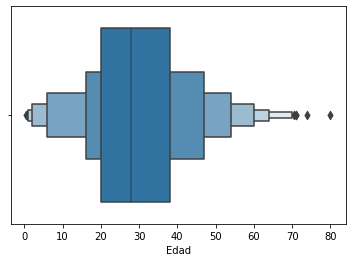

In [ ]:
#hacer un boxplot horizontal
sns.boxenplot(x=datos["Edad"], data=datos)
plt.show()

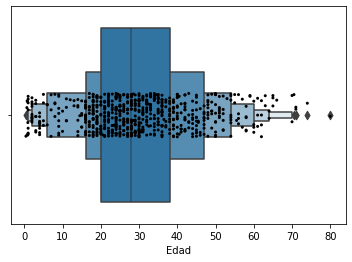

In [ ]:
sns.boxenplot(x=datos["Edad"], data=datos)
sns.stripplot(x=datos["Edad"],size=3,color="black") #colocar puntos stripplot
plt.show()

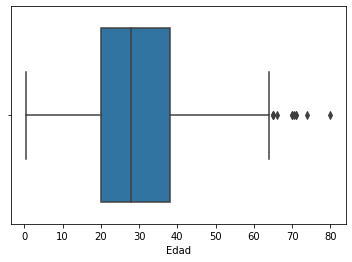

In [ ]:
#hacer otro tipo de gráfico de cajas y bigotes
sns.boxplot(x=datos["Edad"])
plt.show()

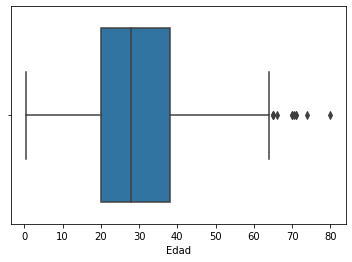

In [ ]:
#otra manera de escribirlo
sns.boxplot(x="Edad", data=datos)
plt.show()

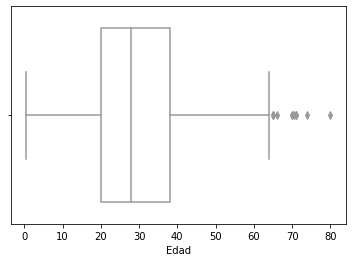

In [ ]:
sns.boxplot(x="Edad", data=datos, color="white") #ponerle color
plt.show()

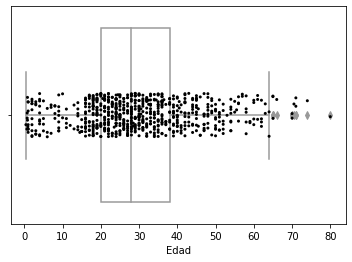

In [ ]:
sns.boxplot(x="Edad", data=datos, color="white") 
sns.stripplot(x="Edad", data=datos, size=3, color="black") #agregamos los puntos de datos
plt.show()

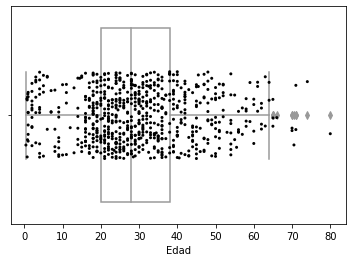

In [ ]:
sns.boxplot(x="Edad", data=datos, color="white") #ponerle color
sns.stripplot(x="Edad", data=datos, size=3, color="black",
              jitter=0.2, ) #aumentamos la esparción de los puntos
plt.show()

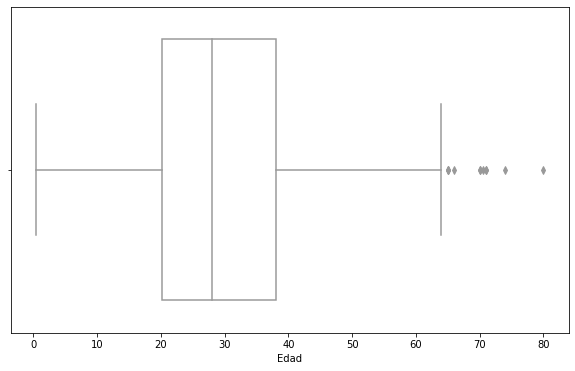

In [ ]:
plt.figure(figsize=(10,6)) #instanciamos la figura y agregamos tamaño x, y
ax=sns.boxplot(x="Edad", data=datos, color="white")
plt.show(ax)

In [ ]:
media

29.699117647058827

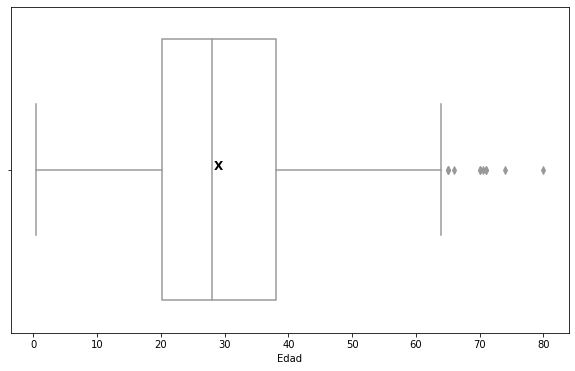

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax.text(29,0, "X", 
        weight="bold",size=12,ha='center')#agregamos la media manualmente
plt.show(ax)

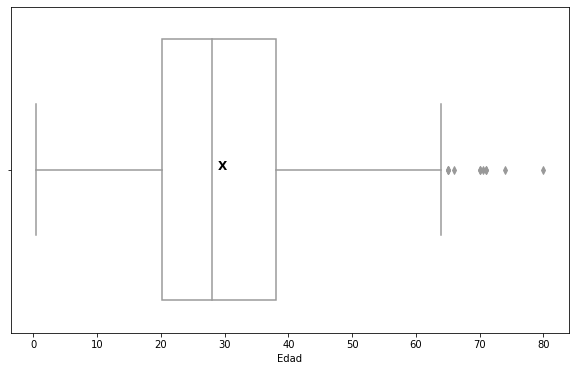

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax.text(datos.Edad.mean(),0, "X", 
        weight="bold",size=12,ha='center')#agregamos la media automatica
plt.show(ax)

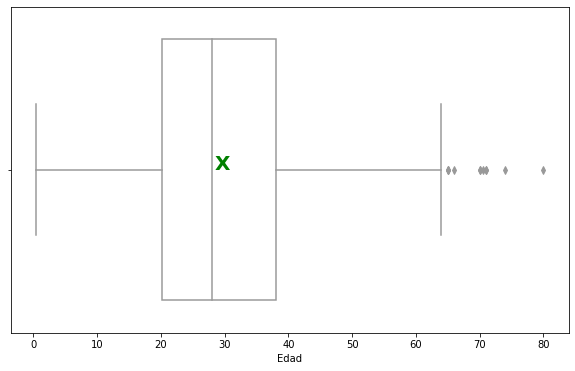

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax.text(datos.Edad.mean(),0, "X", 
        weight="bold",size=20,ha='center', color="g")#agregamos la media automatica
plt.show(ax)

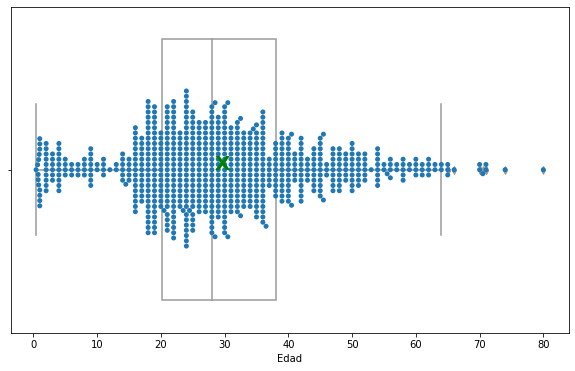

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos) #agregamos otro tipo de puntos swarmplot
ax.text(datos.Edad.mean(),0, "X", 
        weight="bold",size=20,ha='center', color="g")
plt.show(ax)

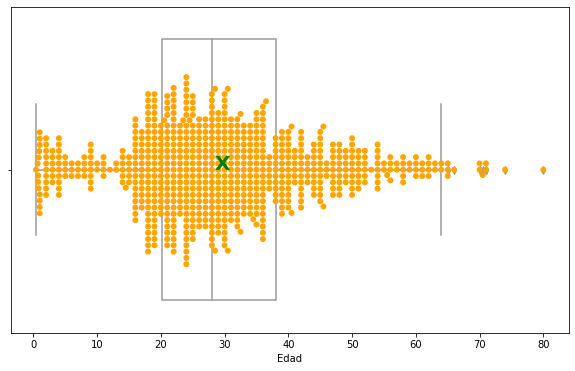

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos,
                  color="orange", size=6) #agregamos características a los puntos
ax.text(datos.Edad.mean(),0, "X", weight="bold",size=20,ha='center', color="g")
plt.show(ax)

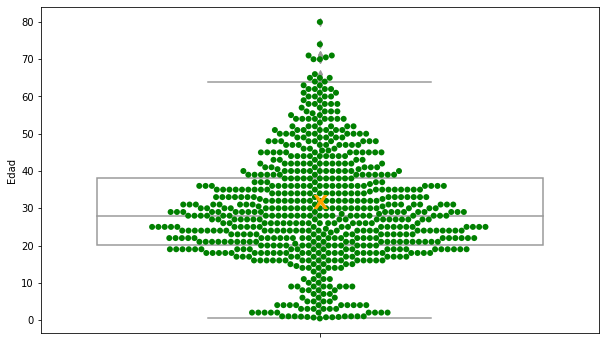

In [ ]:
#Gráfico en Y vertical
plt.figure(figsize=(10,6))
ax=sns.boxplot(y="Edad", data=datos, color="white")
ax =sns.swarmplot(y="Edad", data=datos, color="green", size=6)
ax.text(0,datos.Edad.mean(), "X", weight="bold",size=20,ha='center', color="orange")
plt.show(ax)

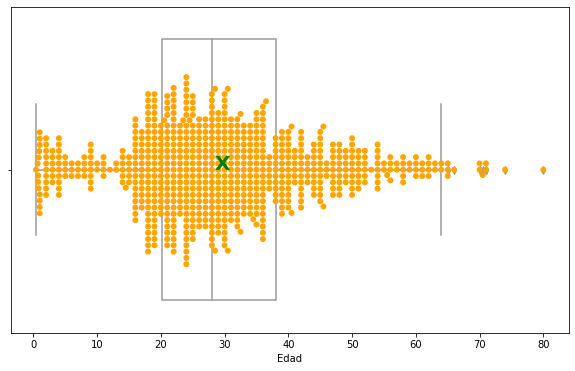

In [ ]:
#Final Gráfico
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos,color="orange", size=6)
ax.text(datos.Edad.mean(),0, "X", weight="bold",size=20,ha='center', color="g")
plt.show()

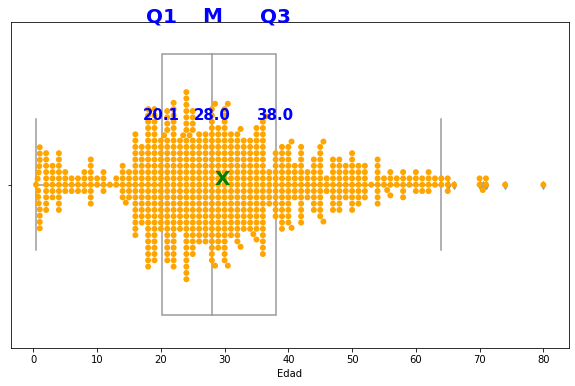

In [ ]:
#poner anotaciones
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos,color="orange", size=6)
ax.text(datos.Edad.mean(),0, "X", weight="bold",size=20,ha='center', color="g")

#creamos las variables de los percentiles
p25=datos["Edad"].quantile(0.25)
p50=datos["Edad"].quantile(0.5)
p75=datos["Edad"].quantile(0.75)

#etiquetas cuartiles
ax.text(p25,-0.5, "Q1", weight="bold",size=20,ha='center', color="b")
ax.text(datos.Edad.median(),-0.5, "M", weight="bold",size=20,ha='center', color="b")
ax.text(p75,-0.5, "Q3", weight="bold",size=20,ha='center', color="b")

#valores cuartiles
ax.text(p25,-0.2, p25.round(1), weight="bold",size=15,ha='center', color="b")
ax.text(p50,-0.2, p50.round(1), weight="bold",size=15,ha='center', color="b")
ax.text(p75,-0.2, p75.round(1), weight="bold",size=15,ha='center', color="b")

plt.show(ax)

## 4.- Métodos gráficos de exploración de variables cualitativas

Por favor ver el capítulo gráficos circulares en función

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


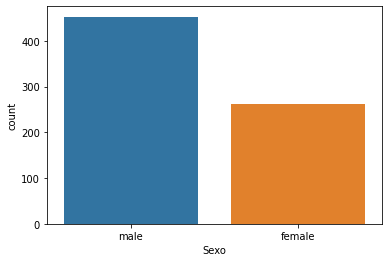

In [20]:
sns.countplot(datos["Sexo"]) #hacer un gráfico básico de cantidades

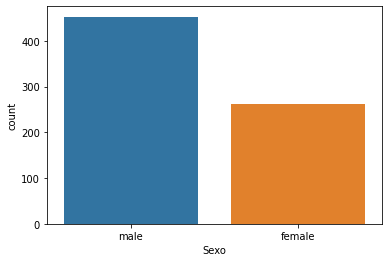

In [21]:
sns.countplot(x="Sexo",data=datos) # cambiar la sintaxis

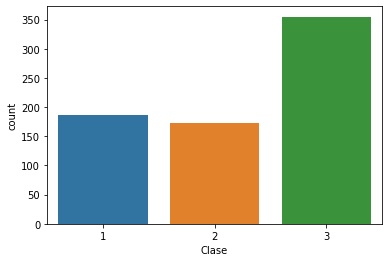

In [24]:
sns.countplot(x="Clase",data=datos)  # probar con otra variables

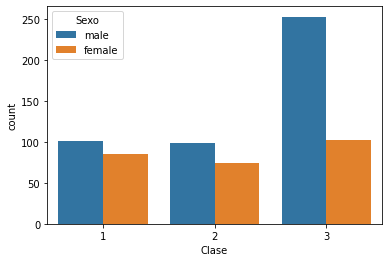

In [29]:
sns.countplot(x="Clase",hue="Sexo",data=datos) #agrupar las barras

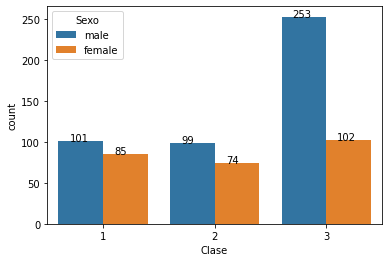

In [40]:
#colocar las anotaciones
ax=sns.countplot(x="Clase",hue="Sexo",data=datos) #poner en una variable ax

#agregar la funcion parches
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

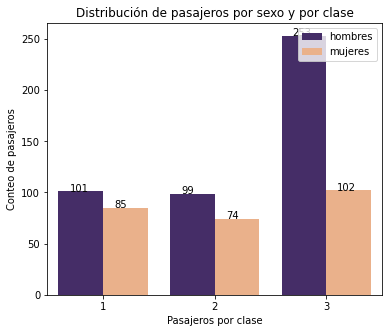

In [49]:
#agregar otras características al gráfico con matplotlib

plt.figure(figsize=(6,5)) #Tamaño ancho x, alto y
ax=sns.countplot(x="Clase",hue="Sexo",data=datos,palette=['#432371',"#FAAE7B"]) #cambiar colores

plt.title('Distribución de pasajeros por sexo y por clase') #título
plt.xlabel('Pasajeros por clase') #ejex
plt.ylabel('Conteo de pasajeros') #eje Y

plt.legend(["hombres","mujeres"], loc="upper right") #incluso cambiar la leyenda

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

plt.show()

In [41]:
#biblio https://seaborn.pydata.org/generated/seaborn.countplot.html #ver lo del catplot

Ver el capítulo de tablas de distribución de frecuencias

## 5.- Métodos gráficos de exploración de variables agrupadas

### 5.1 Gráficos de cajas y bigotes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


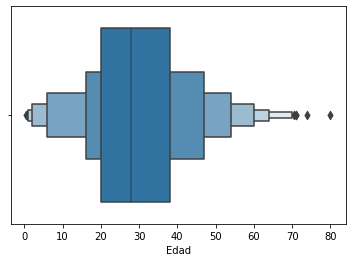

In [ ]:
#aislar datos
#graficamos en cajas y bigotes los datos de la edad
sns.boxenplot(datos["Edad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


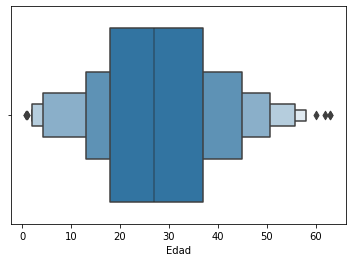

In [ ]:
#aislar datos
#graficamos en cajas y bigotes los datos de la edad
#pero solo los del sexo femenino
sns.boxenplot(datos["Edad"][datos.Sexo=="female"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


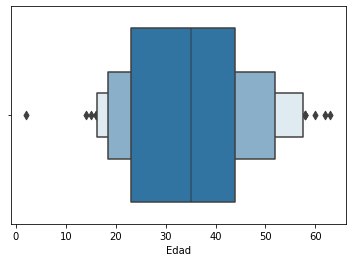

In [ ]:
#aislar datos
#graficamos en cajas y bigotes los datos de la edad
#pero solo los del sexo y que sean de la clase 1
sns.boxenplot(datos["Edad"][datos.Sexo=="female"][datos.Clase==1])

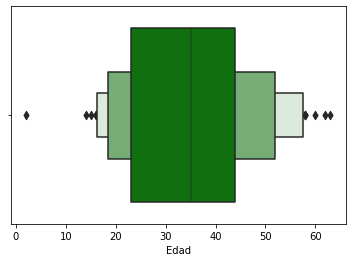

In [ ]:
#Arreglamos errores
sns.boxenplot(x=datos["Edad"][datos.Sexo=="female"][datos.Clase==1],color="green") # poner x
plt.show()

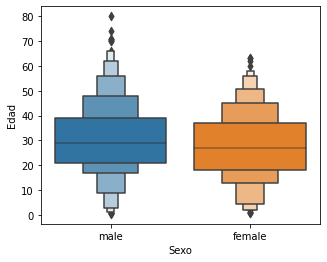

In [ ]:
#una variable de agrupamiento en la X
#una variable cuantitativa en la Y

plt.figure(figsize=(5,4))
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
plt.show(ax)

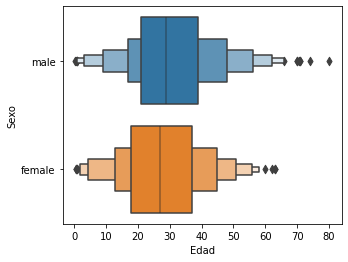

In [ ]:
#una variable de agrupamiento en la y
#una variable cuantitativa en la x

plt.figure(figsize=(5,4))
ax=sns.boxenplot(y="Sexo", x="Edad", data=datos)
plt.show(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


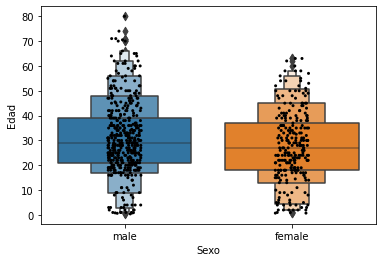

In [ ]:
plt.figure(figsize=(5,4))
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
#colocar puntos
ax =sns.stripplot(x="Sexo", y="Edad", data=datos, size=3, jitter=True, color="black")
print(ax)

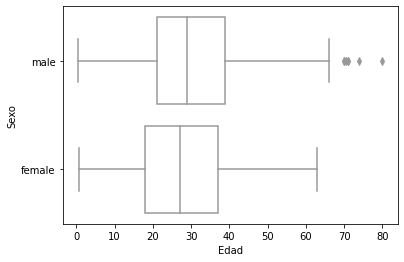

In [ ]:
#segundo tipo de boxplot
ax = sns.boxplot(x="Edad" , y="Sexo", data=datos,color="White")

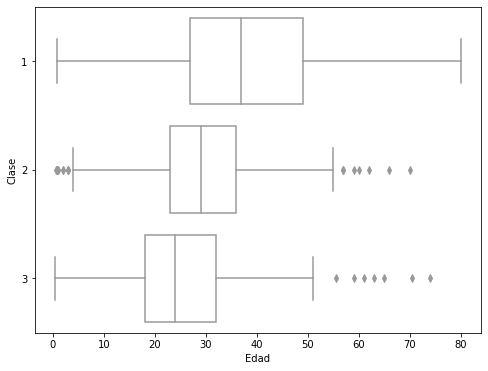

In [ ]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
plt.show()

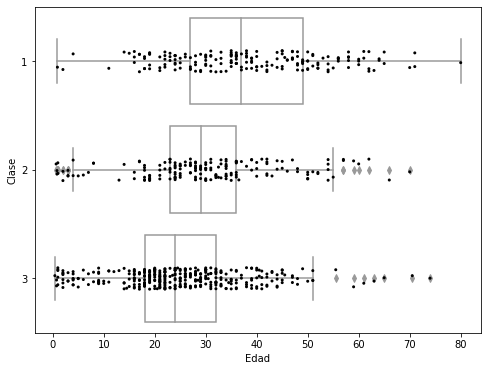

In [ ]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
ax =sns.stripplot(x="Edad", y="Clase", data=datos,
                  size=3, jitter=True, color="black")
plt.show()

In [ ]:
########
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
ax =sns.stripplot(x="Edad", y="Clase", data=datos) #poner otro tipo de puntos investigar jitter=True, edgecolor="gray"
plt.show(ax)

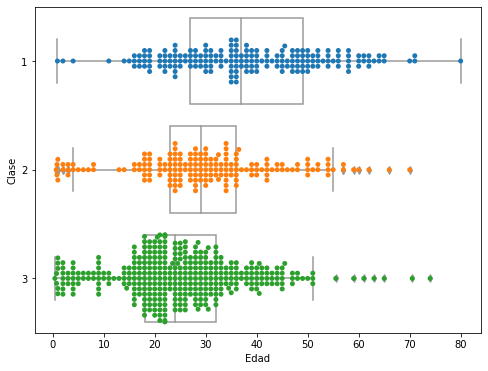

In [ ]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
ax =sns.swarmplot(x="Edad", y="Clase", data=datos) #poner otro tipo de puntos
plt.show(ax)

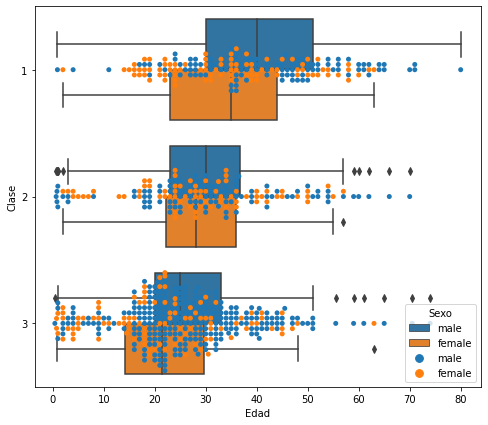

In [ ]:
#graficar 3 variables 2 cualitativas y 1 cuantitativa
plt.figure(figsize=(8,7))
ax = sns.boxplot(x="Edad" , y="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(x="Edad", y="Clase", data=datos,hue="Sexo") #poner otro tipo de puntos
plt.show(ax)

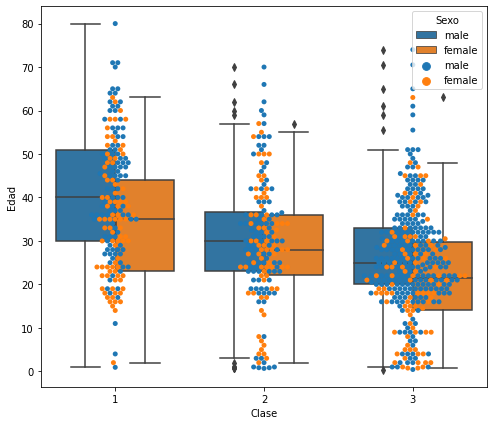

In [ ]:
#lo graficamos todo en vertical
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(y="Edad", x="Clase", data=datos,hue="Sexo") #investigar edgecolor="gray"
plt.show(ax)

In [ ]:
#lo graficamos todo en vertical
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(y="Edad", x="Clase", data=datos) #quitamos el hue #investigar edgecolor="gray"
plt.show(ax)

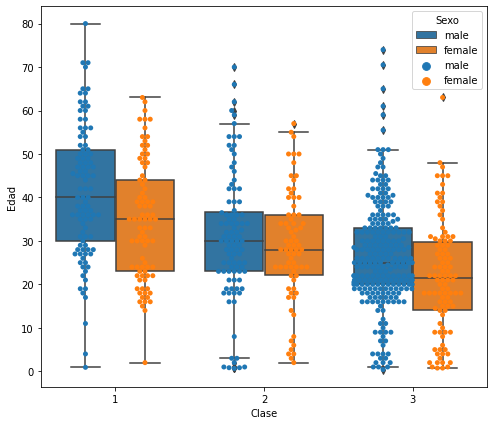

In [ ]:
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(y="Edad", x="Clase", data=datos,hue="Sexo", dodge=True) #hacer un split en los puntos
plt.show(ax)

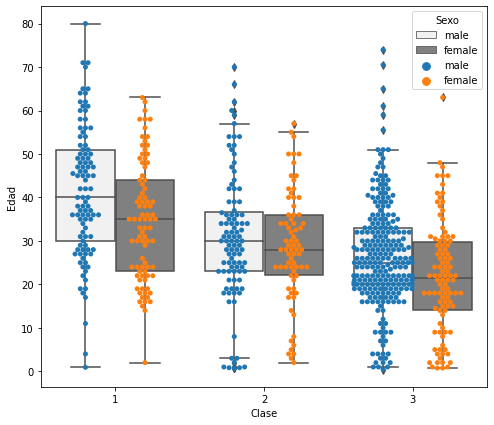

In [ ]:
#lo graficamos todo en vertical
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo",color="gray") #ponemos un color gris #investigar edgecolor="gray"
ax =sns.swarmplot(y="Edad", x="Clase", data=datos,hue="Sexo", dodge=True) 
plt.show(ax)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


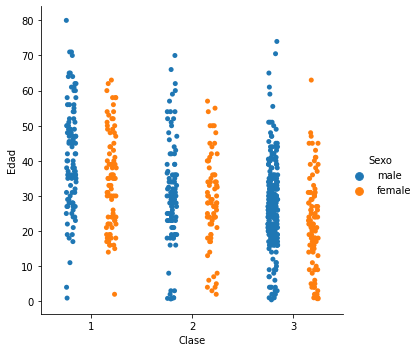

In [ ]:
#Gráfico de catplot sencillo
sns.catplot(x="Clase", y="Edad", hue="Sexo",split=True,
                    data=datos)

<Figure size 576x720 with 0 Axes>

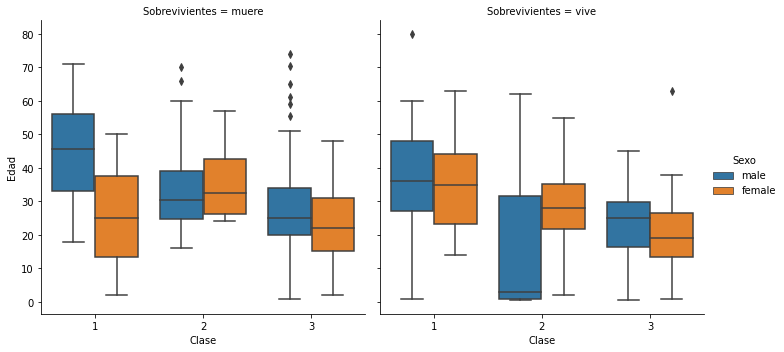

In [ ]:
##graficar 4 variables 3 cualitativas y 1 cuantitativa

#biblio https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
#biblio https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot

plt.figure(figsize=(8,10))
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="box",
                );       
plt.show(ax)



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x720 with 0 Axes>

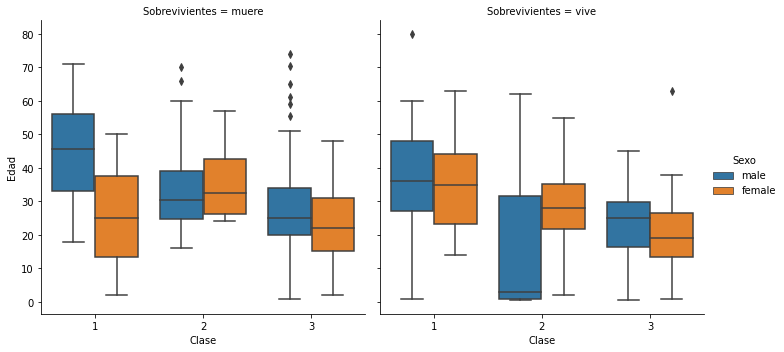

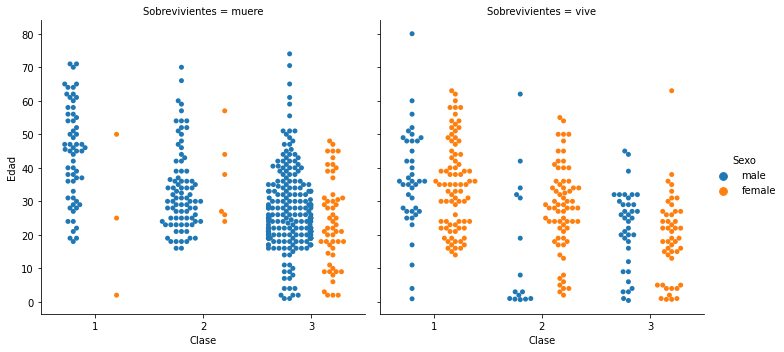

In [ ]:
plt.figure(figsize=(8,10))
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="box",
                );

 #agregamos gráfico de puntos              
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="swarm",dodge=True
                );
                  
plt.show(ax)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x1080 with 0 Axes>

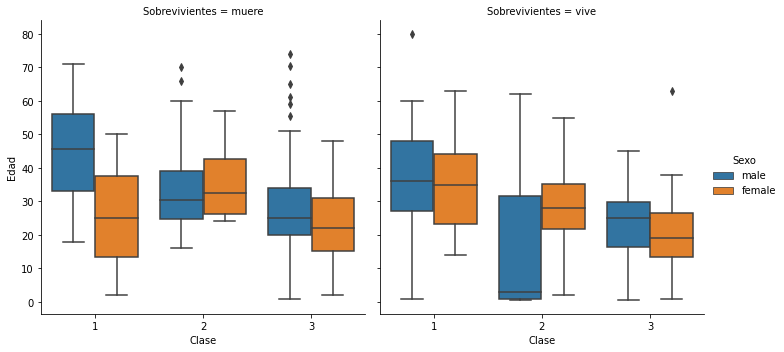

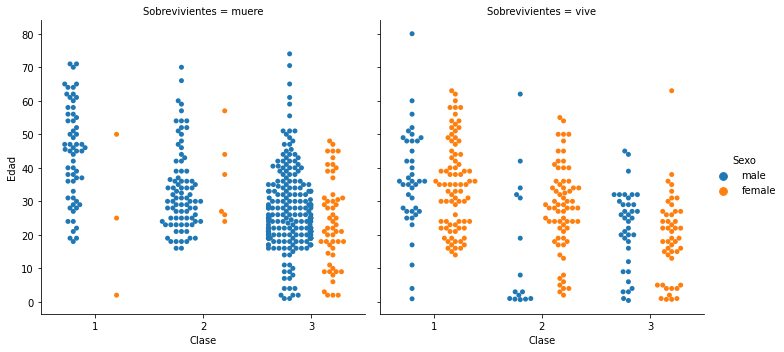

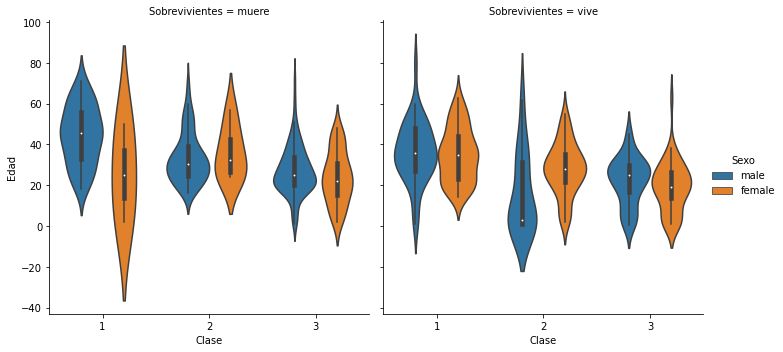

In [ ]:
plt.figure(figsize=(8,15))
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="box",
                );
                
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="swarm",dodge=True
                );

#agregamos graficos de violines
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="violin",dodge=True
                );
                  
plt.show(ax)


### 5.2 Histogramas

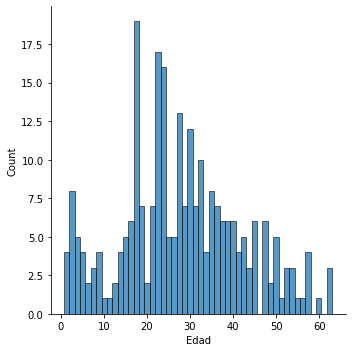

In [ ]:
#hacemos una gráfical de histograma de una variable aislada
#edad pero solo los del sexo femenio
sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50)

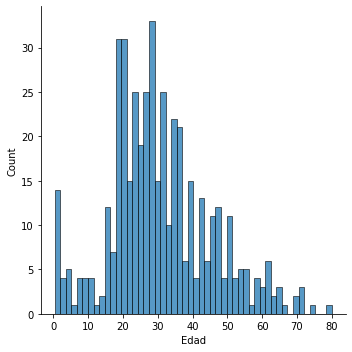

In [ ]:
#ahora los del sexo masculino
sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50)

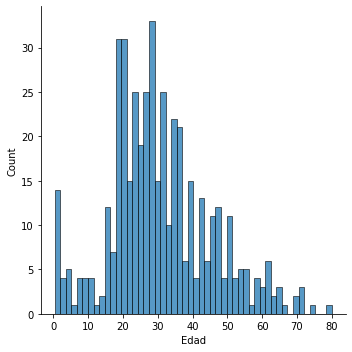

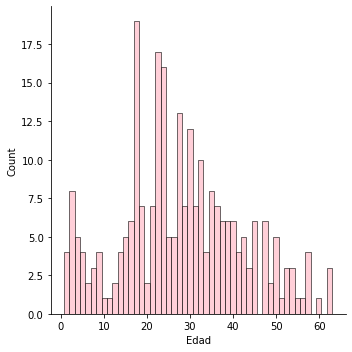

In [ ]:
#las dos juntas
ax=sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50)
ax=sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50, color="pink")

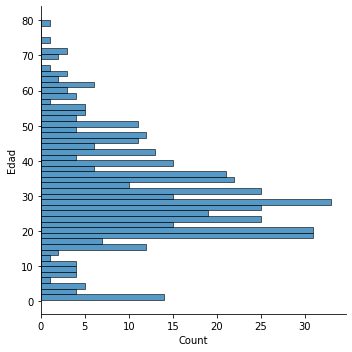

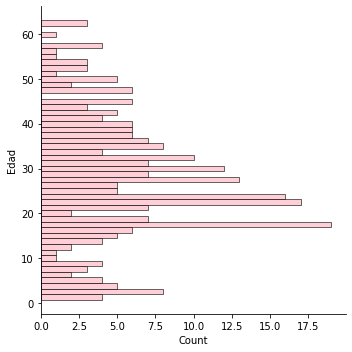

In [ ]:
#las dos juntas pero en el eje y
ax=sns.displot(y=datos["Edad"][datos.Sexo=="male"], bins=50)
ax=sns.displot(y=datos["Edad"][datos.Sexo=="female"], bins=50, color="pink")

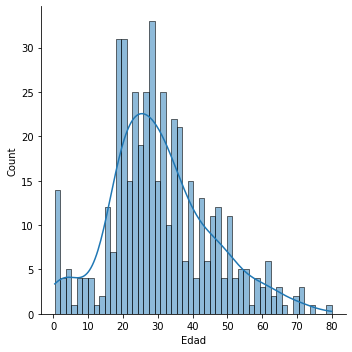

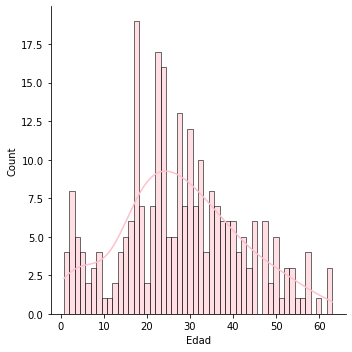

In [ ]:
#reacomodamos las gráficas en x y agregamos linea de tendencia
ax=sns.displot(x=datos["Edad"][datos.Sexo=="male"], bins=50, kde=True,)
ax=sns.displot(x=datos["Edad"][datos.Sexo=="female"], bins=50, color="pink", kde=True,)


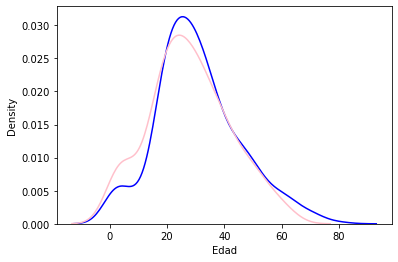

In [ ]:
#vemos como se comparan las líneas de tendencia con kdeplot
sns.kdeplot(datos["Edad"][datos.Sexo=="male"],color="blue")
sns.kdeplot(datos["Edad"][datos.Sexo=="female"],color="pink")

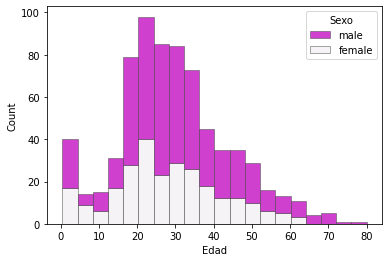

In [ ]:
#histogramos  con histplot
sns.histplot(
    datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

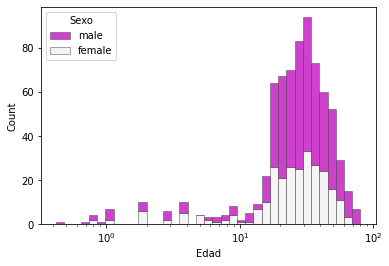

In [ ]:
sns.histplot(
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
)

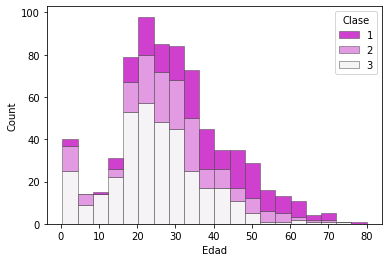

In [ ]:
#edad por clase
sns.histplot(
    datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

Text(0.5, 1.0, 'histograma de edad por clase')

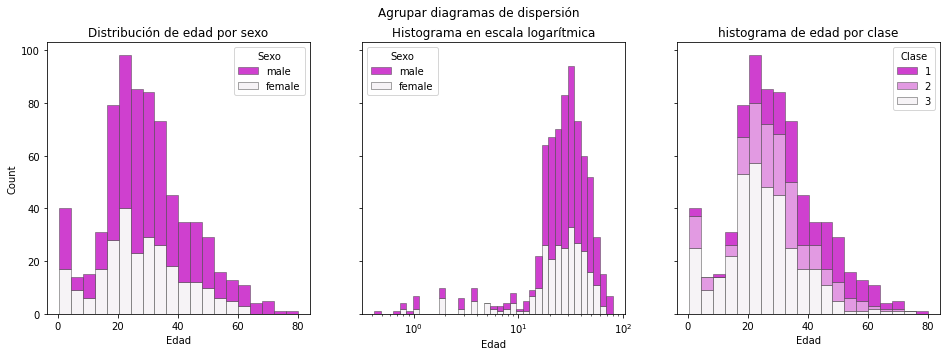

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle('Agrupar diagramas de dispersión')

# primero
sns.histplot(
    ax=axes[0],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[0].set_title("Distribución de edad por sexo")

#segundo
sns.histplot(
    ax=axes[1],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
)

axes[1].set_title("Histograma en escala logarítmica")

# Tercero
sns.histplot(
    ax=axes[2],
    data=datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[2].set_title("histograma de edad por clase")

Text(0.5, 1.0, 'Histograma de edad por clase')

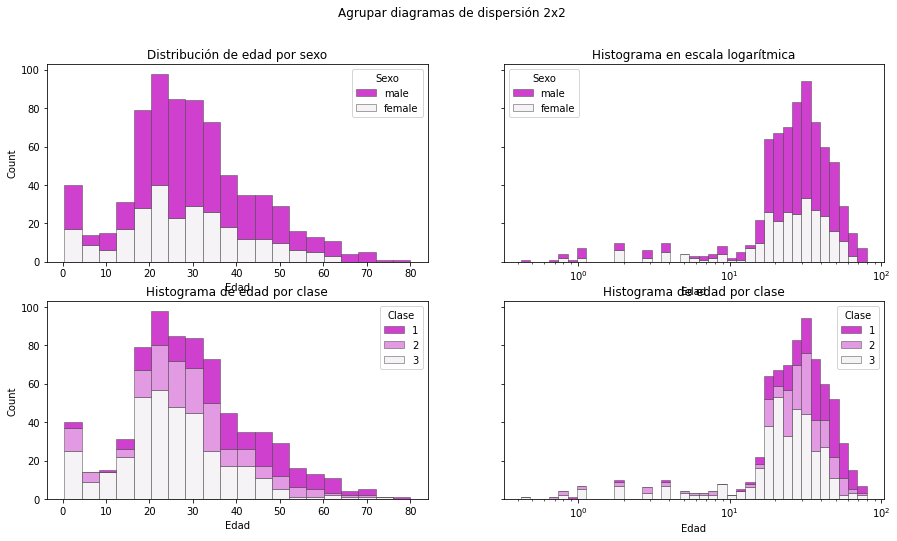

In [ ]:
#mismo gráfico pero ahora 2 X 2 
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey=True) #filas, columnas
fig.suptitle('Agrupar diagramas de dispersión 2x2')

# primero
sns.histplot(
    ax=axes[0,0],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[0,0].set_title("Distribución de edad por sexo")

#segundo
sns.histplot(
    ax=axes[0,1],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
)

axes[0,1].set_title("Histograma en escala logarítmica")

# Tercero
sns.histplot(
    ax=axes[1,0],
    data=datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[1,0].set_title("Histograma de edad por clase")

# Cuarto
sns.histplot(
    ax=axes[1,1],
    data=datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
 
)


axes[1,1].set_title("Histograma de edad por clase")

### 5.3 Gráfico de violin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


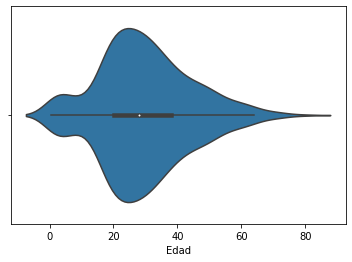

In [ ]:
#Gráfico de violin básico
sns.violinplot(datos["Edad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


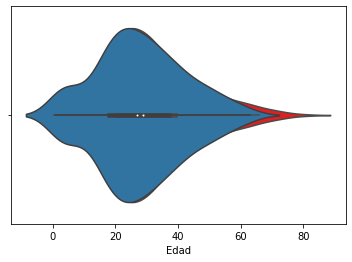

In [ ]:
#Graficar una variable aislada
sns.violinplot(datos["Edad"][datos.Sexo=="male"],color="red")
sns.violinplot(datos["Edad"][datos.Sexo=="female"])

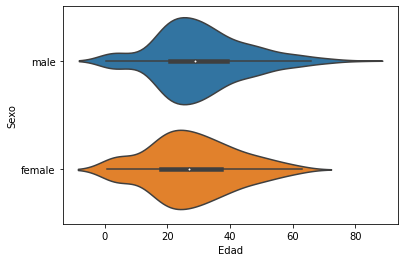

In [ ]:
#dos variables , una de agrupación (cualitativa) eje Y y una cuantitativa eje X
sns.violinplot(x="Edad", y="Sexo", data=datos)

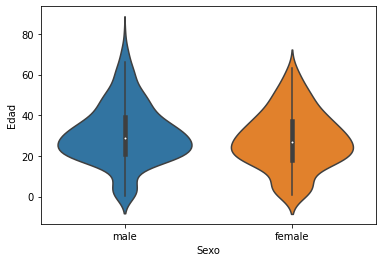

In [ ]:
sns.violinplot(x="Sexo", y="Edad", data=datos) #transpuesta

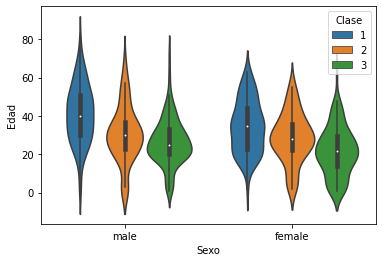

In [ ]:
sns.violinplot(x="Sexo", y="Edad",hue="Clase", data=datos) # 3 variables, dos nominales y una cuantitativa

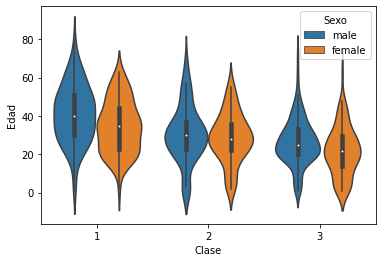

In [ ]:
sns.violinplot(x="Clase", y="Edad",hue="Sexo", data=datos)  # probamos con otras variables

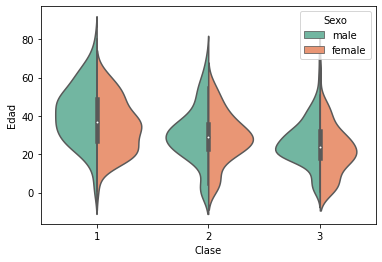

In [ ]:
ax = sns.violinplot(x="Clase", y="Edad", hue="Sexo",
                    data=datos, palette="Set2", split=True, # hacemos un corte en lugar de agrupar
                   )

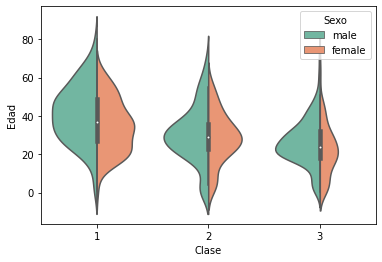

In [ ]:
#falta hacer un scatplot

In [ ]:
#falta agrupar en subplots

### 5.4 Gráficos de Barras

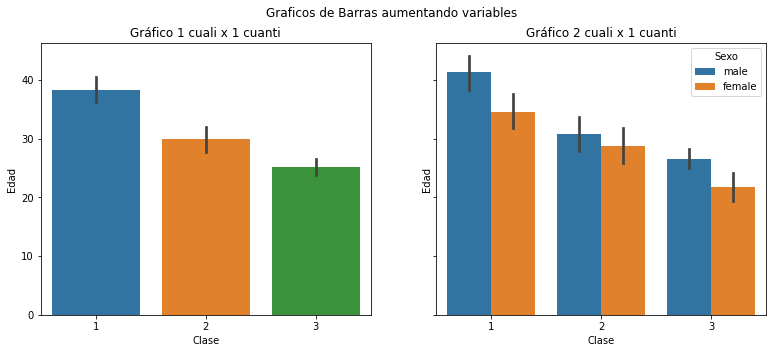

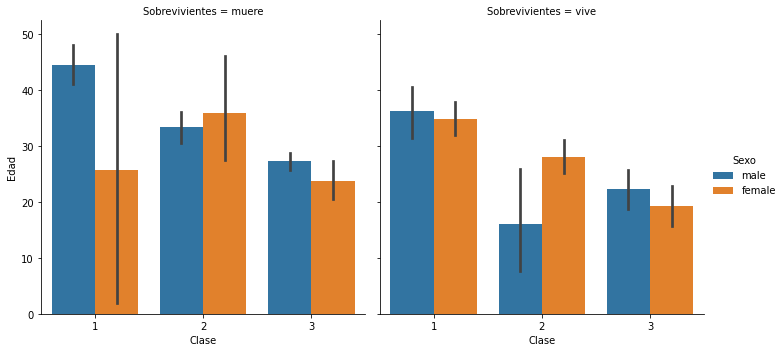

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True) # va a ser sólo de dos
fig.suptitle('Graficos de Barras aumentando variables')

# 2 variables una cualitativa de agrupamiento (clase) , una cuantitativa edad
sns.barplot(ax=axes[0], x=datos.Clase, y=datos.Edad)
axes[0].set_title("Gráfico 1 cuali x 1 cuanti")

# 3 variables dos cualitativa de agrupamiento (clase), (Sexo) , una cuantitativa edad
sns.barplot(ax=axes[1], x=datos.Clase, y=datos.Edad, hue=datos.Sexo)
axes[1].set_title("Gráfico 2 cuali x 1 cuanti")

#Hacemos una gráfica a parte para catplots
#cat plot no acepta estar en subplots

sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="bar",
                );


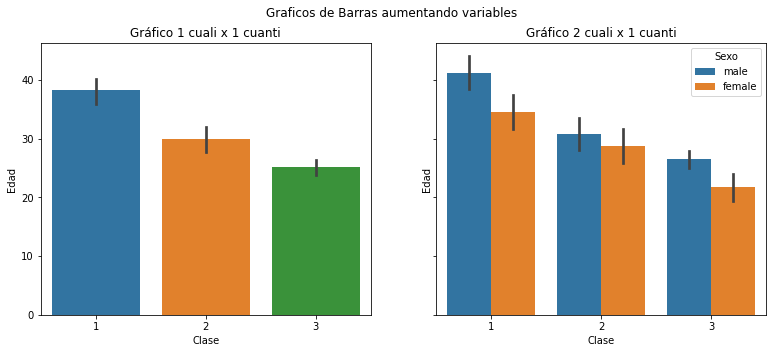

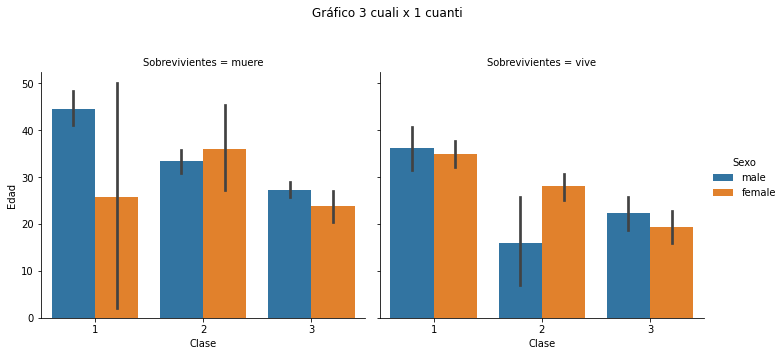

In [90]:
#poner título
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True) 
fig.suptitle('Graficos de Barras aumentando variables')

sns.barplot(ax=axes[0], x=datos.Clase, y=datos.Edad)
axes[0].set_title("Gráfico 1 cuali x 1 cuanti")

sns.barplot(ax=axes[1], x=datos.Clase, y=datos.Edad, hue=datos.Sexo)
axes[1].set_title("Gráfico 2 cuali x 1 cuanti")

#guardar en variable cat
cat=sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="bar",
                );

cat.fig.suptitle('Gráfico 3 cuali x 1 cuanti') #con cat ponemos titulos
cat.fig.subplots_adjust(top=.8)#poner altura al titulo

## 6.-estadísticas por variables agrupadas

In [104]:
#estadísticos descriptivos gorupby
agrupados_datos =datos.groupby('Sexo')
agrupados_datos.describe().round(1).transpose()

Sexo        female   male
Edad count   261.0  453.0
     mean     27.9   30.7
     std      14.1   14.7
     min       0.8    0.4
     25%      18.0   21.0
     50%      27.0   29.0
     75%      37.0   39.0
     max      63.0   80.0

In [105]:
#estadísticos descriptivos gorupby
agrupados_datos =datos.groupby(['Sexo','Clase'])
agrupados_datos.describe().round(1).transpose()

Sexo       female                male             
Clase           1     2      3      1     2      3
Edad count   85.0  74.0  102.0  101.0  99.0  253.0
     mean    34.6  28.7   21.8   41.3  30.7   26.5
     std     13.6  12.9   12.7   15.1  14.8   12.2
     min      2.0   2.0    0.8    0.9   0.7    0.4
     25%     23.0  22.2   14.1   30.0  23.0   20.0
     50%     35.0  28.0   21.5   40.0  30.0   25.0
     75%     44.0  36.0   29.8   51.0  36.8   33.0
     max     63.0  57.0   63.0   80.0  70.0   74.0

In [106]:
#estadísticos descriptivos gorupby
agrupados_datos =datos.groupby(['Sexo','Clase',"Sobrevivientes"])
agrupados_datos.describe().round(1).transpose()

Sexo           female                          ...  male                         
Clase               1           2           3  ...     1     2            3      
Sobrevivientes  muere  vive muere  vive muere  ...  vive muere  vive  muere  vive
Edad count        3.0  82.0   6.0  68.0  55.0  ...  40.0  84.0  15.0  215.0  38.0
     mean        25.7  34.9  36.0  28.1  23.8  ...  36.2  33.4  16.0   27.3  22.3
     std         24.0  13.2  12.9  12.8  12.8  ...  14.9  12.2  19.5   12.1  11.6
     min          2.0  14.0  24.0   2.0   2.0  ...   0.9  16.0   0.7    1.0   0.4
     25%         13.5  23.2  26.2  21.8  15.2  ...  27.0  24.8   1.0   20.0  16.5
     50%         25.0  35.0  32.5  28.0  22.0  ...  36.0  30.5   3.0   25.0  25.0
     75%         37.5  44.0  42.5  35.2  31.0  ...  48.0  39.0  31.5   34.0  29.8
     max         50.0  63.0  57.0  55.0  48.0  ...  80.0  70.0  62.0   74.0  45.0

[8 rows x 12 columns]

In [108]:
#estadísticos descriptivos gorupby
agrupados_datos =datos.groupby(['Sexo','Clase',"Sobrevivientes"])
agrupados_datos.mean().round(1)

Edad
Sexo   Clase Sobrevivientes      
female 1     muere           25.7
             vive            34.9
       2     muere           36.0
             vive            28.1
       3     muere           23.8
             vive            19.3
male   1     muere           44.6
             vive            36.2
       2     muere           33.4
             vive            16.0
       3     muere           27.3
             vive            22.3

In [150]:

agrupados_datos =datos.groupby(['Sexo','Clase',"Sobrevivientes"])
agrupados_datos.mean().round(1)

mediaas=agrupados_datos.mean() #poner 


#cambiar el nombre
mediaas.rename(columns={"Edad":"media_edad"})

media_edad
Sexo   Clase Sobrevivientes            
female 1     muere            25.666667
             vive             34.939024
       2     muere            36.000000
             vive             28.080882
       3     muere            23.818182
             vive             19.329787
male   1     muere            44.581967
             vive             36.248000
       2     muere            33.369048
             vive             16.022000
       3     muere            27.255814
             vive             22.274211

In [124]:
rango_inter_cuartil=agrupados_datos.quantile(0.75)-agrupados_datos.quantile(0.25)
rango_inter_cuartil

Edad
Sexo   Clase Sobrevivientes       
female 1     muere           24.00
             vive            20.75
       2     muere           16.25
             vive            13.50
       3     muere           15.75
             vive            13.00
male   1     muere           23.00
             vive            21.00
       2     muere           14.25
             vive            30.50
       3     muere           14.00
             vive            13.25

In [127]:
#hacer un data Frame con el cuartil 1- 3 y el rango intercuartil
#ver de que esta compuesto
rango_inter_cuartil.columns

Index(['Edad'], dtype='object')

In [131]:
#ver de que esta compuesto
rango_inter_cuartil.columns[0]

'Edad'

In [128]:
rango_inter_cuartil.index

MultiIndex([('female', 1, 'muere'),
            ('female', 1,  'vive'),
            ('female', 2, 'muere'),
            ('female', 2,  'vive'),
            ('female', 3, 'muere'),
            ('female', 3,  'vive'),
            (  'male', 1, 'muere'),
            (  'male', 1,  'vive'),
            (  'male', 2, 'muere'),
            (  'male', 2,  'vive'),
            (  'male', 3, 'muere'),
            (  'male', 3,  'vive')],
           names=['Sexo', 'Clase', 'Sobrevivientes'])

In [196]:
#ya que sabemos como está compuesto sacamos las otras dos variables cuartil 1 y cuartil 3
rango_inter_cuartil=agrupados_datos.quantile(0.75)-agrupados_datos.quantile(0.25)
primer_cuartil=agrupados_datos.quantile(0.25)
tercer_cuartil=agrupados_datos.quantile(0.75)

#vamos a crear añadir columnas al df primer cuartil
#cambiar el nombre
nuevo_df=primer_cuartil.rename(columns={"Edad":"primer_cuartil"})

print(nuevo_df)

nuevo_df["tercer_cuartil"]=tercer_cuartil #agregar el tercer cuartil
print(nuevo_df)

nuevo_df["rango_inter"]=rango_inter_cuartil #agregar el rango inter
print(nuevo_df)


                             primer_cuartil
Sexo   Clase Sobrevivientes                
female 1     muere                    13.50
             vive                     23.25
       2     muere                    26.25
             vive                     21.75
       3     muere                    15.25
             vive                     13.50
male   1     muere                    33.00
             vive                     27.00
       2     muere                    24.75
             vive                      1.00
       3     muere                    20.00
             vive                     16.50
                             primer_cuartil  tercer_cuartil
Sexo   Clase Sobrevivientes                                
female 1     muere                    13.50           37.50
             vive                     23.25           44.00
       2     muere                    26.25           42.50
             vive                     21.75           35.25
       3     muere      

Todo lo anterior se hizo con un dataframe que contenia una variable cuantitativa (Edad) sin embargo que sucede con dataframe que tenga más de una variable cuantitativa

In [216]:
#vamos a trabajar con un nuevo dataframe
titanic=sns.load_dataset("titanic")
titanic.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [217]:
agrupados_datos =titanic
agrupados_datos.describe().round(1).transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
pclass,891.0,2.3,0.8,1.0,2.0,3.0,3.0,3.0
age,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0
sibsp,891.0,0.5,1.1,0.0,0.0,0.0,1.0,8.0
parch,891.0,0.4,0.8,0.0,0.0,0.0,0.0,6.0
fare,891.0,32.2,49.7,0.0,7.9,14.5,31.0,512.3


In [224]:
#podemos también aplicar la media y todas las descriptivas a todo el dataframe
#y va a tomar todas las variable cuantitativas del dataframe
agrupados_datos =titanic
agrupados_datos.mean().round(1)

#otros estadísticos
#biblio https://docs.python.org/es/3.8/library/statistics.html

survived       0.4
pclass         2.3
age           29.7
sibsp          0.5
parch          0.4
fare          32.2
adult_male     0.6
alone          0.6
dtype: float64

In [218]:
agrupados_datos =titanic.groupby('sex') #por grupo
agrupados_datos.describe().round(1).transpose()

sex             female   male
survived count   314.0  577.0
         mean      0.7    0.2
         std       0.4    0.4
         min       0.0    0.0
         25%       0.0    0.0
         50%       1.0    0.0
         75%       1.0    0.0
         max       1.0    1.0
pclass   count   314.0  577.0
         mean      2.2    2.4
         std       0.9    0.8
         min       1.0    1.0
         25%       1.0    2.0
         50%       2.0    3.0
         75%       3.0    3.0
         max       3.0    3.0
age      count   261.0  453.0
         mean     27.9   30.7
         std      14.1   14.7
         min       0.8    0.4
         25%      18.0   21.0
         50%      27.0   29.0
         75%      37.0   39.0
         max      63.0   80.0
sibsp    count   314.0  577.0
         mean      0.7    0.4
         std       1.2    1.1
         min       0.0    0.0
         25%       0.0    0.0
         50%       0.0    0.0
         75%       1.0    0.0
         max       8.0    8.0
parch    count   314.0  577.0
         mean      0.6    0.2
         std       1.0    0.6
         min       0.0    0.0
         25%       0.0    0.0
         50%       0.0    0.0
         75%       1.0    0.0
         max       6.0    5.0
fare     count   314.0  577.0
         mean     44.5   25.5
         std      58.0   43.1
         min       6.8    0.0
         25%      12.1    7.9
         50%      23.0   10.5
         75%      55.0   26.6
         max     512.3  512.3

In [221]:
agrupados_datos =titanic.groupby('sex')["age"] #de solo un grupo
agrupados_datos.describe().round(1).transpose()

sex,female,male
count,261.0,453.0
mean,27.9,30.7
std,14.1,14.7
min,0.8,0.4
25%,18.0,21.0
50%,27.0,29.0
75%,37.0,39.0
max,63.0,80.0


In [222]:
agrupados_datos =titanic.groupby('sex')["age","fare"] #de solo dos grupos
agrupados_datos.describe().round(1).transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


sex         female   male
age  count   261.0  453.0
     mean     27.9   30.7
     std      14.1   14.7
     min       0.8    0.4
     25%      18.0   21.0
     50%      27.0   29.0
     75%      37.0   39.0
     max      63.0   80.0
fare count   314.0  577.0
     mean     44.5   25.5
     std      58.0   43.1
     min       6.8    0.0
     25%      12.1    7.9
     50%      23.0   10.5
     75%      55.0   26.6
     max     512.3  512.3

In [223]:
#de solo un grupo y filtrar una característica
agrupados_datos =titanic["age"][titanic.sex=="female"]
agrupados_datos.describe().round(1)

count    261.0
mean      27.9
std       14.1
min        0.8
25%       18.0
50%       27.0
75%       37.0
max       63.0
Name: age, dtype: float64

In [236]:
#de solo un grupo y filtrar dos o mas  característica
agrupados_datos =titanic["age"][titanic.sex=="female"][titanic.alive=="yes"]
agrupados_datos.describe().round(1)

count    197.0
mean      28.8
std       14.2
min        0.8
25%       19.0
50%       28.0
75%       38.0
max       63.0
Name: age, dtype: float64

In [226]:
#de dos o mas grupos y filtrar una característica
agrupados_datos =titanic[["age","fare"]][titanic.sex=="female"]
agrupados_datos.describe().round(1)

,age,fare
count,261.0,314.0
mean,27.9,44.5
std,14.1,58.0
min,0.8,6.8
25%,18.0,12.1
50%,27.0,23.0
75%,37.0,55.0
max,63.0,512.3


In [237]:
#de dos o mas grupos y filtrar dos o mas características
agrupados_datos =titanic[["age","fare"]][titanic.sex=="female"][titanic.alive=="yes"]
agrupados_datos.describe().round(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,fare
count,197.0,233.0
mean,28.8,51.9
std,14.2,64.1
min,0.8,7.2
25%,19.0,13.0
50%,28.0,26.0
75%,38.0,76.3
max,63.0,512.3


## 7.-Análisis exploratorio de variables cuamtitativas

In [253]:
#vamos a trabajar con un nuevo dataframe
datos_iris=sns.load_dataset("iris")
datos_iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


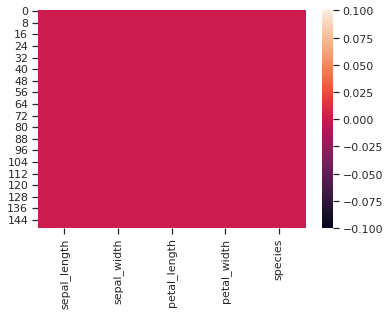

In [254]:
#ver los valores nulos en un gráfico
sns.heatmap(datos_iris.isnull())
#la edad y cabin hay varios nulos

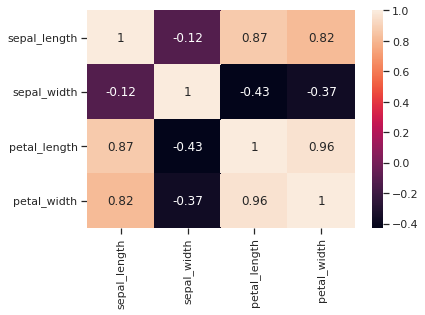

In [245]:
#ver la correlacion de las variables cuantitativas
sns.heatmap(datos_iris.corr(), annot=True) #mapa de correlaciones

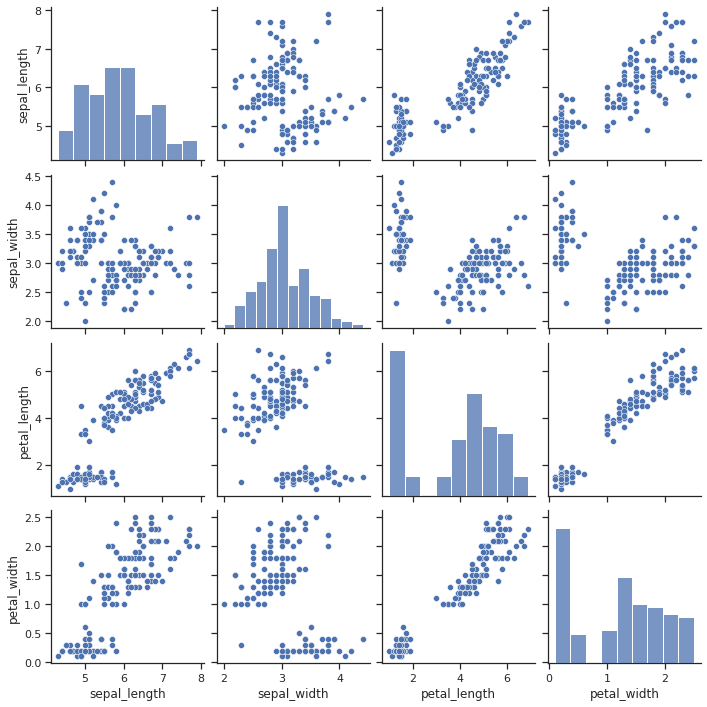

In [263]:
#biblio https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos_iris)

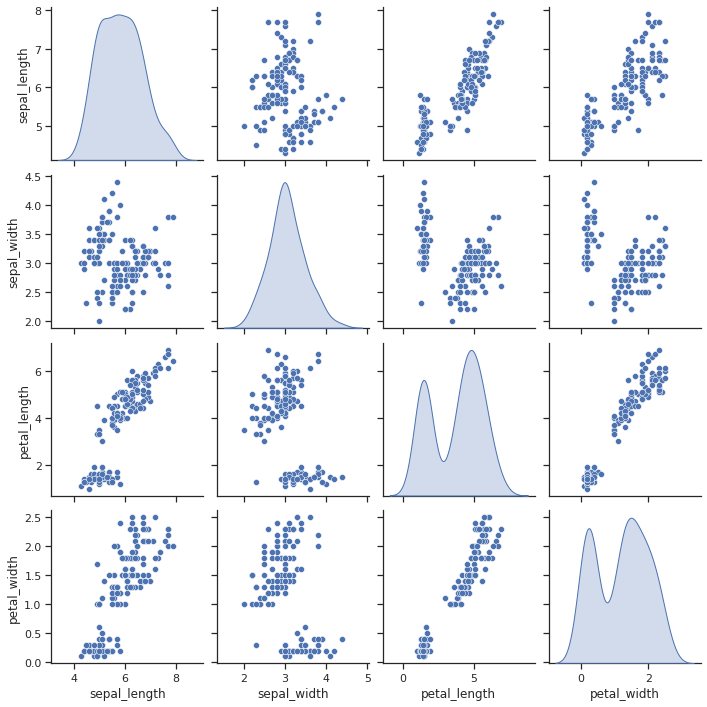

In [268]:
sns.pairplot(datos_iris, diag_kind="kde")

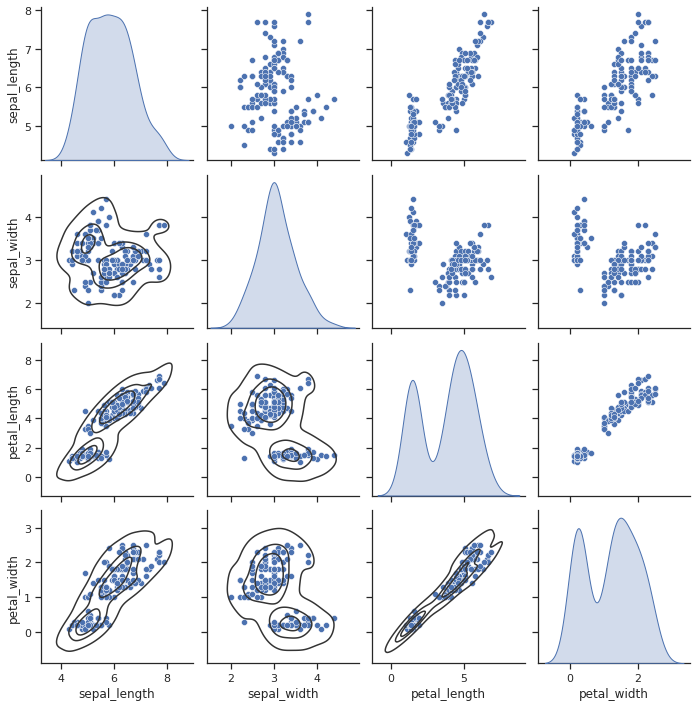

In [269]:
g = sns.pairplot(datos_iris, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [274]:
datos_iris.species.unique() #ver las unicas especies que tiene

array(['setosa', 'versicolor', 'virginica'], dtype=object)

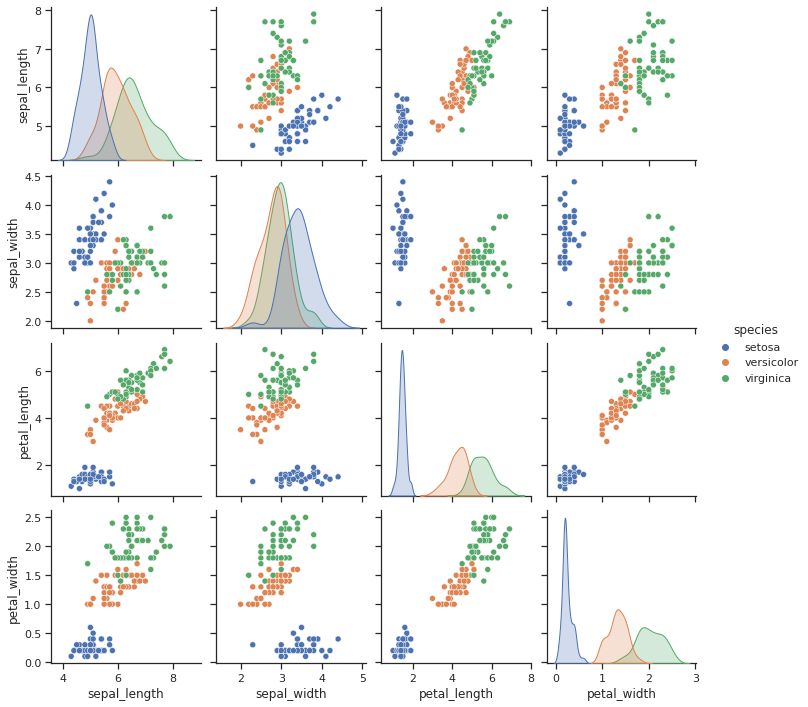

In [257]:
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos_iris,hue="species")

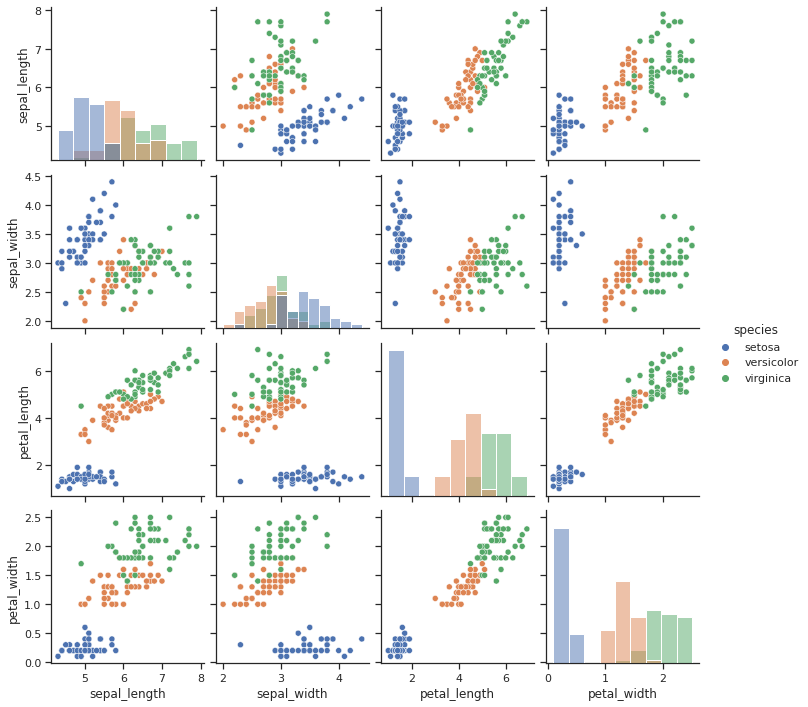

In [258]:
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos_iris,hue="species",diag_kind="hist")

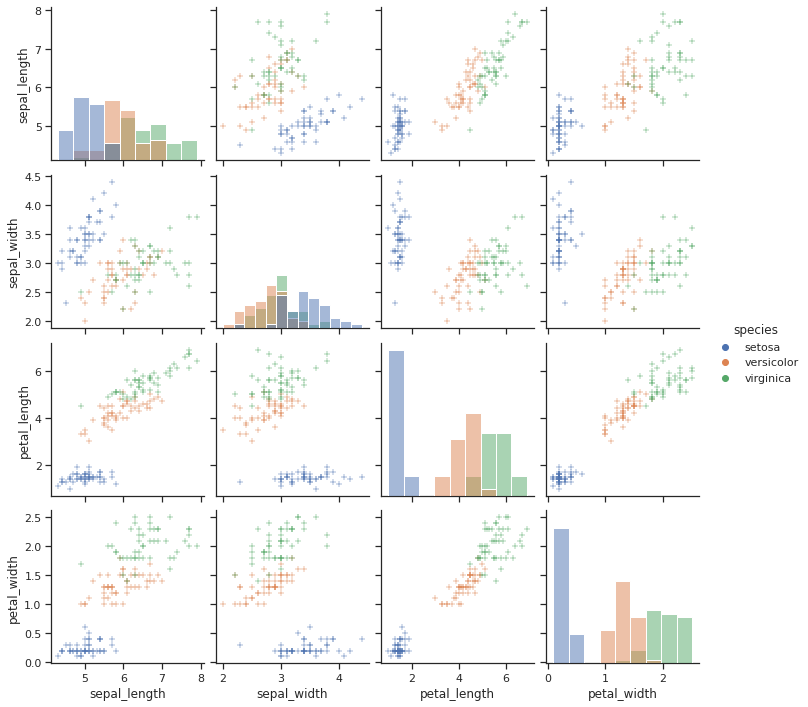

In [260]:
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos_iris,hue="species",diag_kind="hist", markers="+")

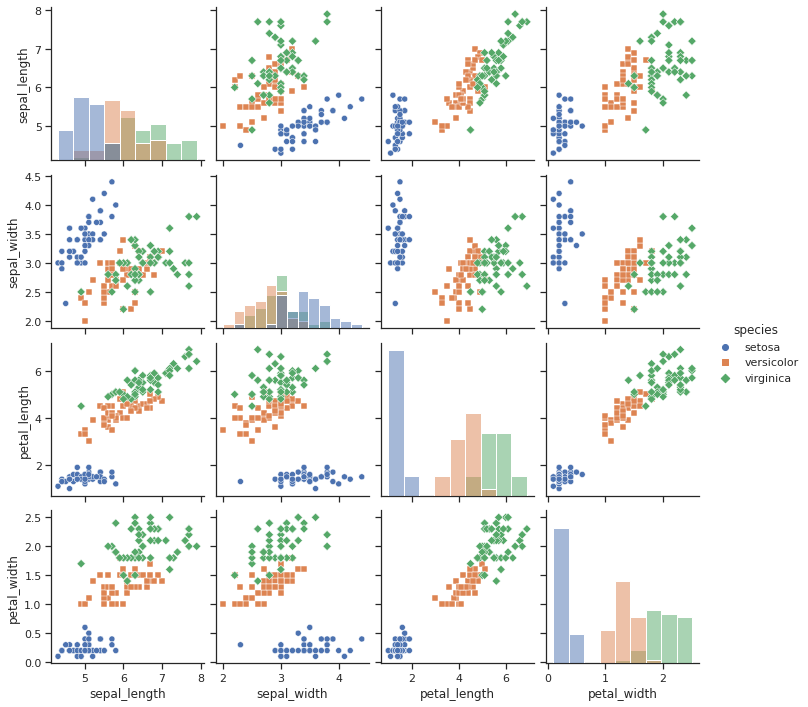

In [261]:
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos_iris,hue="species",diag_kind="hist",  markers=["o", "s", "D"])

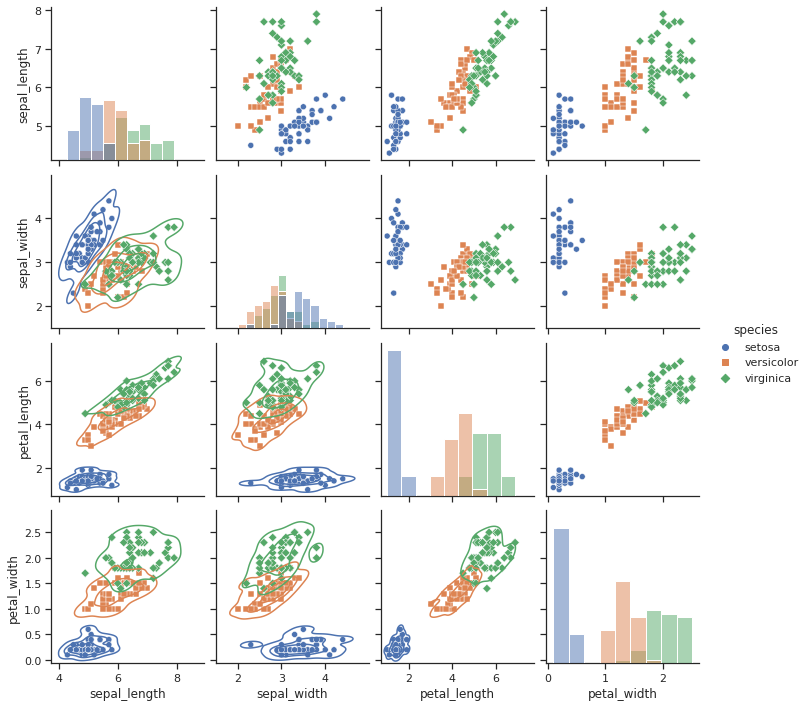

In [270]:
g=sns.set(style="ticks",font_scale=1)
g=sns.pairplot(datos_iris,hue="species",diag_kind="hist",  markers=["o", "s", "D"])
g.map_lower(sns.kdeplot, levels=4, color=".2")

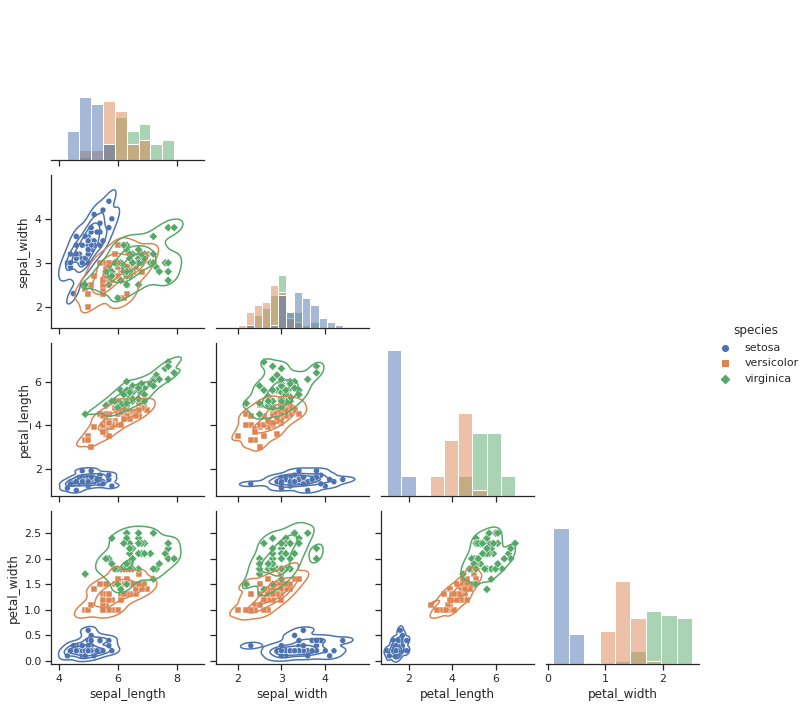

In [271]:
g=sns.set(style="ticks",font_scale=1)
g=sns.pairplot(datos_iris,hue="species",diag_kind="hist",  markers=["o", "s", "D"], corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

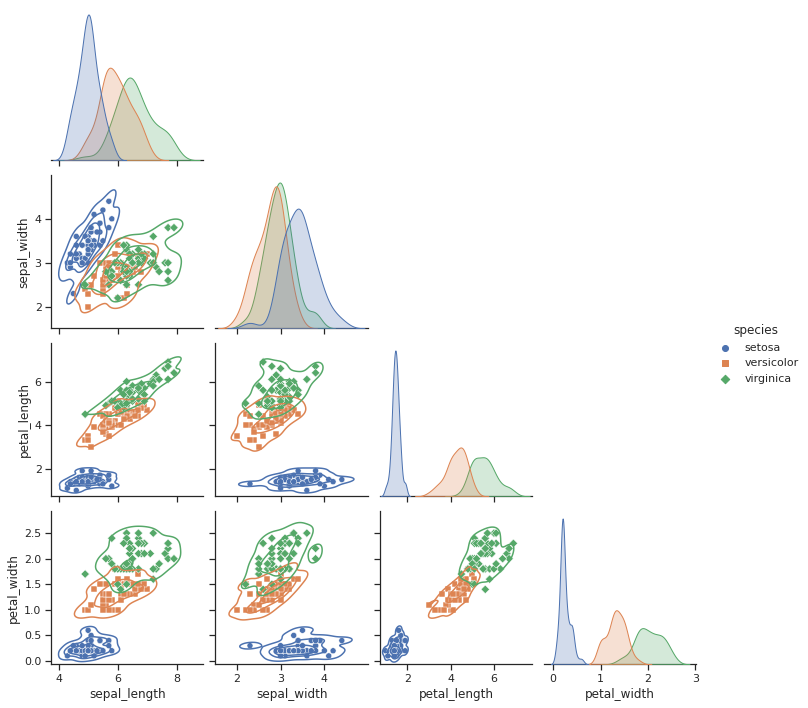

In [272]:
g=sns.set(style="ticks",font_scale=1)
g=sns.pairplot(datos_iris,hue="species",diag_kind="kde",  markers=["o", "s", "D"], corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [276]:
#vamos a trabajar con un nuevo dataframe
datos_p=sns.load_dataset("penguins")
datos_p.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [277]:
datos_p.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [278]:
datos_p.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [279]:
datos_p.sex.unique()

array(['Male', 'Female', nan], dtype=object)

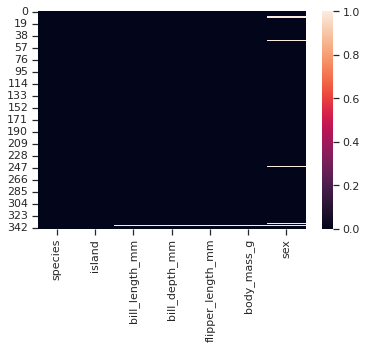

In [281]:
#ver los valores nulos en un gráfico
sns.heatmap(datos_p.isnull())